# This is a comparison between Plotnine and Plotly graphs.
## There are 5 Plotnine graphs that will be shown, and 5 Plotly graphs with more uses than the 5 Plotnine graphs will be shown.

### Before running the imports, be sure to have installed the following packages:

Install Plotly (for creating the 3D scatter plot)

pip install plotly

Install Plotnine (for accessing the 'meat' dataset)

pip install plotnine

In [34]:
import plotly.express as px
import plotnine as pn
from plotnine.data import meat
from plotly.data import iris




### 1. Scatter Plots and 3D Scatter Plots

### I will be using the meat dataframe for the first comparison.

The table below details the monthly per capita consumption of 3 types of meat in the US during 1944. The units are presumably in pounds per person per month. This is a Plotnine dataframe, but it can be utilized with Plotly.

In [37]:
meat.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


We know that Plotnine scatter plot graphs are neat and all. Here's a nice little boring Plotnine scatter plot graph.

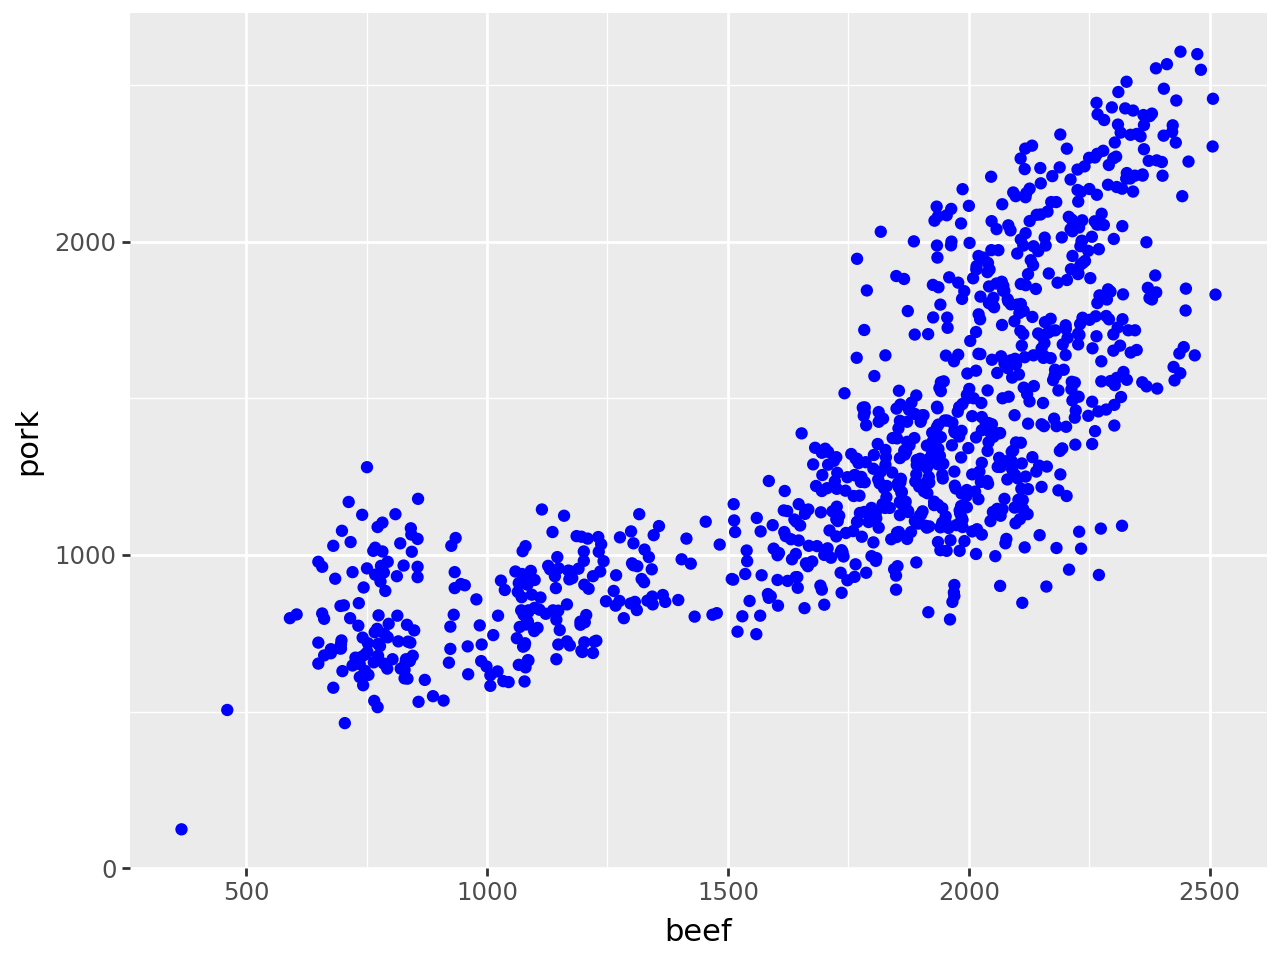

In [38]:
pn.ggplot(meat, pn.aes("beef", "pork")) + pn.geom_point(color="blue") # Simple Plotnine Scatter Plot graph

The graph above is a nice and simple plotnine graph with an easy to apply color of blue. However, the simple graph above cannot compare three variables in a scatter plot. Plotly can!

In [32]:
# Sources for 3d Scatter Plots for Plotly: https://plotly.com/python/3d-scatter-plots/
# https://stackoverflow.com/questions/61980632/update-layout-argument-list-with-plotly

fig = px.scatter_3d( # px.scatter_3d renders a 3D scatter plot
    meat,
    x='beef',
    y='pork',
    z='veal',
    title="3D Scatter Plot of Beef, Pork, and Veal Consumption",
    labels={"beef": "Beef", "pork": "Pork", "veal": "Veal"}, # Shown when hovering over the dots
    color_discrete_sequence=["blue"],  # Color of the dots
    opacity=0.8
)
fig.update_layout( # fig.update_layout allows you to change the layout and appearance of the plot
    scene=dict(
        xaxis_title='Beef Consumption',
        yaxis_title='Pork Consumption',
        zaxis_title='Veal Consumption',
        aspectratio=dict(x=1, y=1, z=0.7),  # aspect ratio...is used to adjust the aspect ratio
    ),
    margin=dict(l=20, r=20, b=20, t=40),  # This is to modify the margin
    width=900,  # This is to set the entire render's width
    height=700,  # This is to set the entire render's height
)


# The line below displays the rendered plot
fig.show()

A nice feature for these 3d graphs is that you can hover over each point, and it will show the exact values that correspond to the point, as well as lines to line them as close as possible to the corresponding tick labels. It may be messy due to the lack of shading, but the ability to specifically analyze each point more than makes up for it!  All this is mainly because ggplot, and Plotnine as a whole, does not have support for 3D graphs. Ggplot is also less customizable, as can be seen by its simple design. I have never worked with 3d graphs before, so this is all fun and new to me!

### 2. Box Plots and Swarm Plots
### I will be using the iris dataframe for the second comparison.

The table below details one observation of an Iris flower. There are three species: Setosa, Versicolor, and Virginica.


In [42]:
iris = px.data.iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


We know that Plotnine box plot graphs are informative and simple. Here's a simple Plotnine box plot graph.

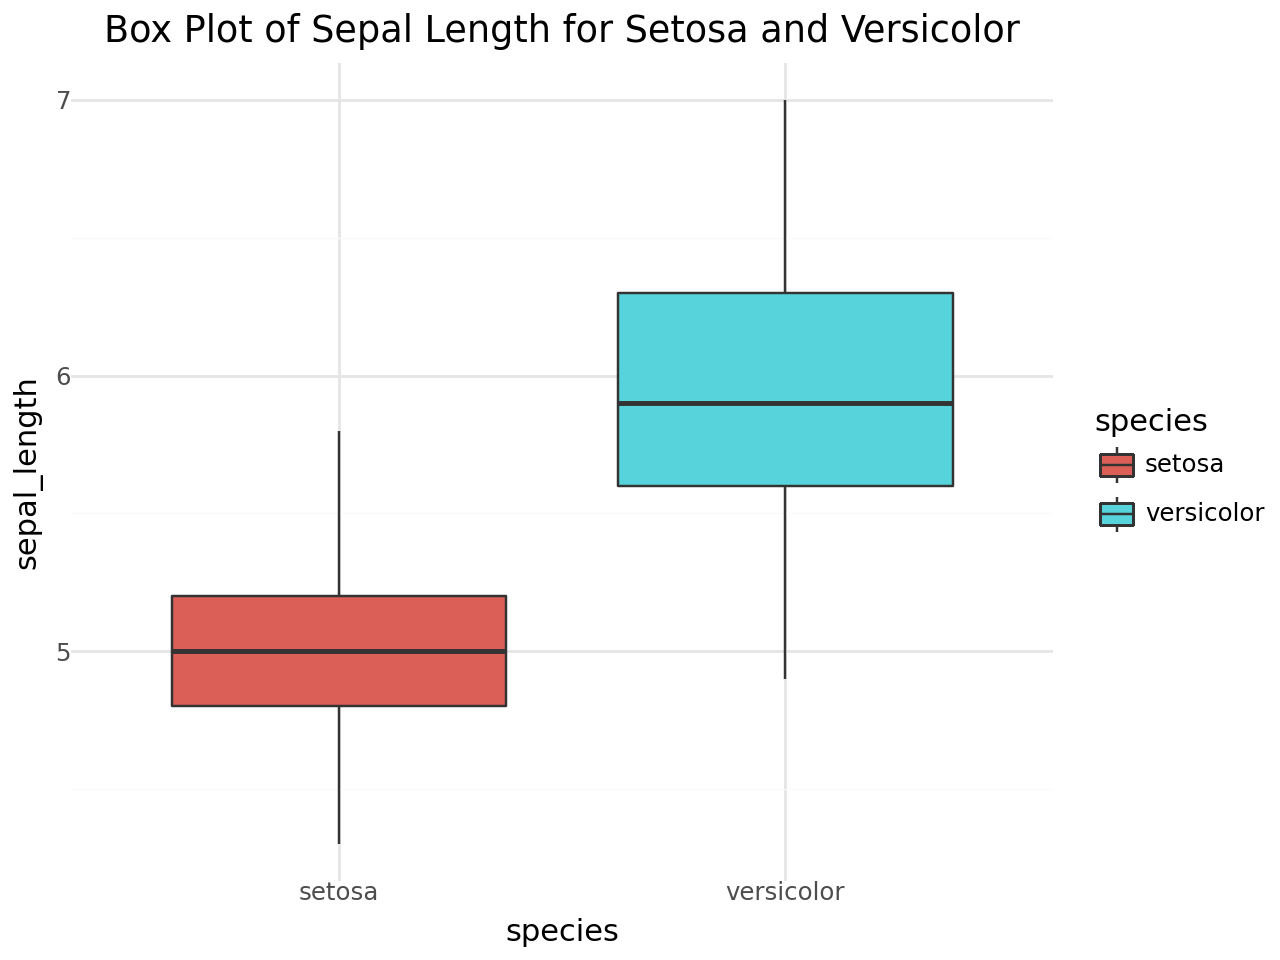

In [ ]:
iris_filtered = iris[iris['species'].isin(['setosa', 'versicolor'])] # Link for isin reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

# A Plotnine box plot displaying the sepal length of the Setosa and Versicolor species
plot = pn.ggplot(iris_filtered, pn.aes(x='species', y='sepal_length', fill='species')) + \
    pn.geom_boxplot() + \
    pn.theme_minimal() + \
    pn.ggtitle("Box Plot of Sepal Length for Setosa and Versicolor")
# Displaying the plot
plot

The above graph doesn't necessarily have anything wrong with it, but it can more advanced in its functions Plotly can give us such a graph, combining dots and the general idea of a box plot into one, called a swarm plot!  It is interesting to note that the above Plotnine graph is using a Plotly dataframe.

In [53]:
# A Plotly swarm plot
fig = px.strip(iris, 
               x="species", 
               y="sepal_length", 
               color="species", 
               stripmode="overlay",  # Creates jitter to space out dots
               title="Swarm Plot of Sepal Length for All Species")

# Displaying the plot
fig.show()

The above Plotly swarm plot is also interactive, showing the species, sepal length, and even the corresponding color. You can zoom in and zoom out on any of three graphs by just moving the whole graph left or right and pressing the included zoom in and zoom out buttons that appear in the top right. In fact, you can even focus on certain data by holding right click over the graph until a box forms. The data you will focus in is within this box.